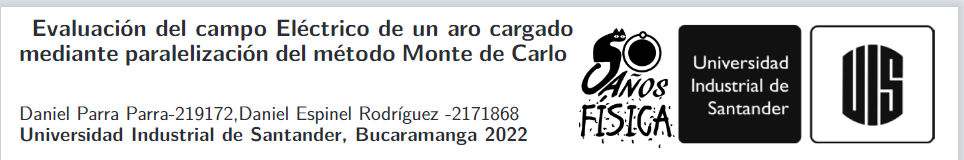


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:Springgreen">**Algoritmo de evaluación de integrales por Montecarlo**</span>.

   * Evaluaremos primeramente la siguiente integral:

$$\int_0^1 x^2 d x=\frac{1}{3} \approx 0,33333$$

La idea consiste es generar (cant_num=n) numeros aleatorios en el intervalo de integración ( lim_inf=a,lim_sup=b) para crear un  vector t , el cual sirve para evaluar la función en cada elemento de este y junto a la multiplicación de $\frac{(limsup-liminf)}{(cant_num)}$
se obtiene la siguiente expresion:

$$\int_a^b f(x) d x=\frac{(b-a)}{\mathrm{n}} * \sum_{i=1}^n f\left(x_i\right)$$



In [2]:
#Integral basica montecarlo
def integra(cant_num):
    suma=0
    lim_inf=0
    lim_sup=1
    cant_num=10000
    t=np.random.uniform(lim_inf,lim_sup,cant_num)
    for i in range(cant_num):
        suma=suma+(t[i]**2)
    resultado=((lim_sup-lim_inf)/(cant_num))*suma
    return resultado

print(integra(10000))

0.33188792295831016


## <span style="color:Springgreen">**Integrales del campo Eléctrico**</span>.



$$\begin{gathered}
\vec{E}=\frac{1}{4 \pi \varepsilon_0} * \int_0^{2 \pi} \frac{R * d \theta * \lambda\left(\left(x_0-R * \cos \theta\right) \hat{\imath}+\left(y_0-R * \sin \theta\right) \hat{\jmath}+z_0 \hat{k}\right)}{\left[\left(x_0-R * \cos \theta\right)^2+\left(y_0-R * \sin \theta\right)^2+z_0^2\right]^{3 / 2}} 
\end{gathered}$$

$$
\begin{gathered}
\\
E_x=\frac{R \lambda}{4 \pi \varepsilon_0} * \int_0^{2 \pi} \frac{\left(x_0-R * \cos \theta\right) d \theta}{\left[\left(x_0-R * \cos \theta\right)^2+\left(y_0-R * \sin \theta\right)^2+z_0^2\right]^{3 / 2}} \\
\end{gathered}$$

$$
\begin{gathered}
E_y=\frac{R \lambda}{4 \pi \varepsilon_0} * \int_0^{2 \pi} \frac{\left(y_0-R * \sin \theta\right) d \theta}{\left[\left(x_0-R * \cos \theta\right)^2+\left(y_0-R * \sin \theta\right)^2+z_0^2\right]^{3 / 2}} \\
\end{gathered}$$

$$\begin{gathered}
E_z=\frac{R \lambda}{4 \pi \varepsilon_0} * \int_0^{2 \pi} \frac{z_0 d \theta}{\left[\left(x_0-R * \cos \theta\right)^2+\left(y_0-R * \sin \theta\right)^2+z_0^2\right]^{3 / 2}}
\end{gathered}$$

Donde $k=\frac{\lambda}{4 \pi \varepsilon_0} $


In [3]:
#montecarlo EX
k=4
r=1
cant_num=10000

def EX(x0,y0,z0):
    suma=0
    lim_inf=0
    lim_sup=2*np.pi  
    t=np.random.uniform(lim_inf,lim_sup,cant_num)  
    for i in range(cant_num):
        suma=suma +   (k*r*(x0-r*np.cos(t[i]))   )/(   ( (x0-r*np.cos(t[i]))**2 +(y0-r*np.sin(t[i]))**2 +(z0)**2 )**(3/2) )
    resultado=((lim_sup-lim_inf)/(cant_num))*suma
    return resultado


#montecarlo EY
def EY(x0,y0,z0):
    suma=0
    lim_inf=0
    lim_sup=2*np.pi
    t=np.random.uniform(lim_inf,lim_sup,cant_num)
    
    for i in range(cant_num):
        suma=suma +   (k*r*(y0-r*np.sin(t[i]))   )/(   ( (x0-r*np.cos(t[i]))**2 +(y0-r*np.sin(t[i]))**2 +(z0)**2 )**(3/2)        )
    resultado=((lim_sup-lim_inf)/(cant_num))*suma
    return resultado
#montecarlo Ez
def EZ(x0,y0,z0):
    suma=0
    lim_inf=0
    lim_sup=2*np.pi
    t=np.random.uniform(lim_inf,lim_sup,cant_num)
    
    for i in range(cant_num):
        suma=suma +    (k*r*z0   )/(    ( (x0-r*np.cos(t[i]))**2 +(y0-r*np.sin(t[i]))**2 +(z0)**2 )**(3/2)        )
    resultado=((lim_sup-lim_inf)/(cant_num))*suma
    return resultado

Ahora mostremos como es el comportamiento del campo electrico  en el espacio para un aro cargado 

### <span style="color:Seagreen">**Grafica real**</span>.


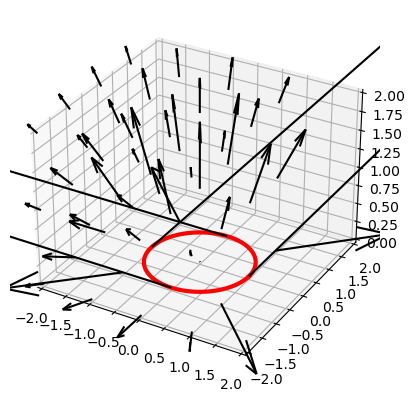

In [4]:
ax = plt.figure().add_subplot(projection='3d')

# Creamos la malla
x, y, z = np.meshgrid(np.arange(-2, 2, 1),
                      np.arange(-2, 2, 1),
                      np.arange(0, 3, 1))

# las componentes del campo electrico
u =EX(x,y,z)
v =EY(x,y,z)
w =EZ(x,y,z)

#Grafica de circunferencia
t=np.linspace(0,np.deg2rad(360),100,"b-")
x1=1*np.cos(t)
y1=1*np.sin(t)


#plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, pivot='mid',color='g')
ax.quiver(x, y, z, u, v, w, color='k',length=0.1)
plt.plot(x1,y1,0,"-r",lw=3.0)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

``NOTA:Probablemente se preguntará porque sobre la circunferencia da infinito, esto se debe a que ahí el campo DIVERGE
es decir , ahí nacen las lineas de campo , es como tener r=0 por lo que da infinio``

``Esto se debe a que tomamos los puntos de la circunferencia``

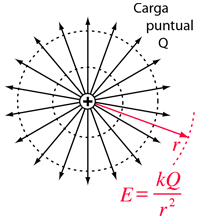

``Note también que el camp oelectrico decrece con la distancia``

### <span style="color:Seagreen">**Grafica normalizada**</span>.

``NOTA:Esta grafica carece de caracter físico ya que el campo no decrece con la distancia``

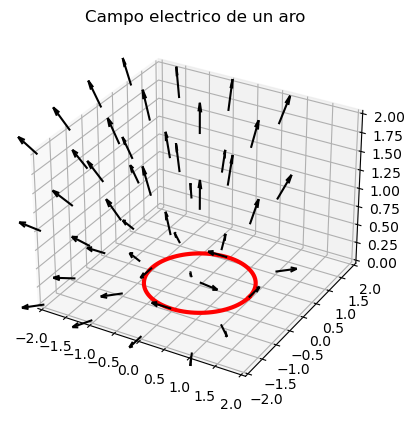

In [5]:
ax = plt.figure().add_subplot(projection='3d')

# Creamos la malla
x, y, z = np.meshgrid(np.arange(-2, 2, 1),
                      np.arange(-2, 2, 1),
                      np.arange(0, 3, 1))

# las componentes del campo electrico
u =EX(x,y,z)
v =EY(x,y,z)
w =EZ(x,y,z)

#Grafica de circunferencia
t=np.linspace(0,np.deg2rad(360),100,"b-")
x1=1*np.cos(t)
y1=1*np.sin(t)


#plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, pivot='mid',color='g')
ax.quiver(x, y, z, u, v, w, color='k',length=0.4,normalize=True)
plt.plot(x1,y1,0,"-r",lw=3.0)
plt.title("Campo electrico de un aro")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()




###  <span style="color:Springgreen">**Graficas de rendimiento**</span>.

In [6]:
import pandas as pd

datos1=pd.read_excel("rendimiento.xlsx",usecols=("A:B"),skiprows=0)
datos2=pd.read_excel("rendimiento.xlsx",usecols=("E:G"),skiprows=0)
datos3=pd.read_excel("rendimiento.xlsx",usecols=("I:J"),skiprows=0)


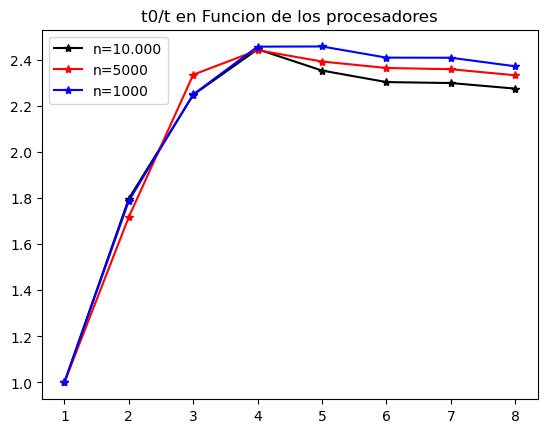

In [7]:
t1=np.array(datos1["time"])
t2=np.array(datos2["time.1"])
t3=np.array(datos3["time.2"])
proc=np.array(datos1["procesadores"])

plt.plot(proc,t1,"*-k")
plt.plot(proc,t2,"*-r")
plt.plot(proc,t3,"*-b")
plt.title("t0/t en Funcion de los procesadores")
plt.legend(('n=10.000', 'n=5000', 'n=1000'))